In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Porject3/data.csv")

In [4]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
ds.shape

(569, 33)

In [6]:
ds.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
ds = ds.drop(columns=ds.columns[-1])

In [9]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
ds.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<ipython-input-11-1fcde4faaecb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ds['diagnosis'], palette=custom_palette)


Number of cells labeled Benign:  357
Number of cells labeled Malignant:  212

% of cells labeled Benign: 62.74 %
% of cells labeled Malignant: 37.26 %


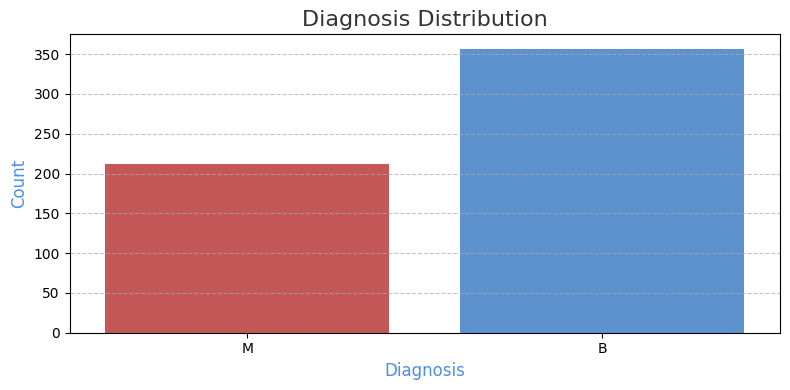

In [11]:
# Set custom blue and red colors
custom_palette = {'B': '#4A90E2', 'M': '#D64545'}  # 'B' for Benign, 'M' for Malignant

# Plot customization
plt.figure(figsize=(8, 4))
sns.countplot(x=ds['diagnosis'], palette=custom_palette)

# Add title and axis labels
plt.title('Diagnosis Distribution', fontsize=16, color='#333333')
plt.xlabel('Diagnosis', fontsize=12, color='#4A90E2')
plt.ylabel('Count', fontsize=12, color='#4A90E2')

# Display gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#AAAAAA')

# Count the number of observations in each class
benign, malignant = ds['diagnosis'].value_counts()

# Print values to the console
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant: ', malignant)
print('')
print('% of cells labeled Benign:', round(benign / len(ds) * 100, 2), '%')
print('% of cells labeled Malignant:', round(malignant / len(ds) * 100, 2), '%')

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
ds.nunique()

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [13]:
y = ds['diagnosis']

In [14]:
columns_to_keep = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                   'smoothness_mean', 'compactness_mean', 'concavity_mean',
                   'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

ds_f = ds[columns_to_keep]

In [15]:
ds_f.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

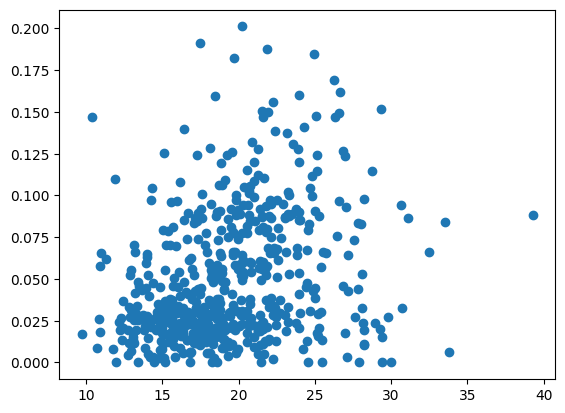

In [16]:
plt.scatter(x='texture_mean', y='concave points_mean', data=ds_f)

In [17]:
ds_f.query('texture_mean > 35 | (`concave points_mean` > 0.125 & texture_mean < 12)') #239 0

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871
239,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,0.05966


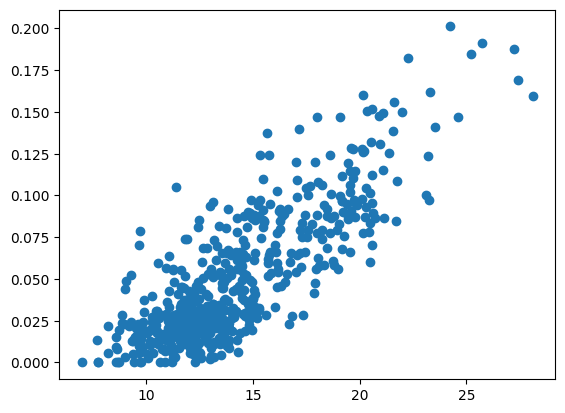

In [18]:
plt.scatter(x='radius_mean', y='concave points_mean', data=ds_f)

In [19]:
ds_f.query('`concave points_mean` > 0.185 | (`concave points_mean` > 0.135 & radius_mean >= 25)') #82 122 180 212 352 461

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
82,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782
122,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877
180,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121
461,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623


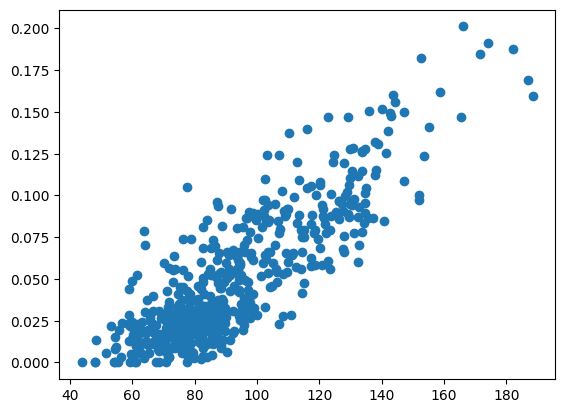

In [20]:
plt.scatter(x='perimeter_mean', y='concave points_mean', data=ds_f)

In [21]:
ds_f.query('`concave points_mean` > 0.185 | (`concave points_mean` > 0.150 & perimeter_mean > 160)') #82 122 180 212 352 461

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
82,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782
122,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877
180,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121
461,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623


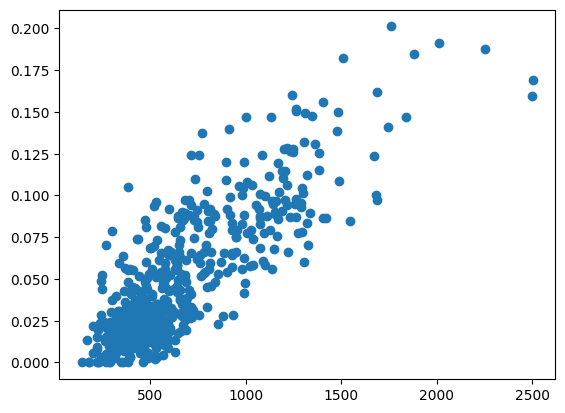

In [22]:
plt.scatter(x='area_mean', y='concave points_mean', data=ds_f)

In [23]:
ds_f.query('`concave points_mean` > 0.185 | (`concave points_mean` > 0.155 & area_mean > 1800)') #82 122 180 212 352 461

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
82,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782
122,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877
180,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121
461,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623


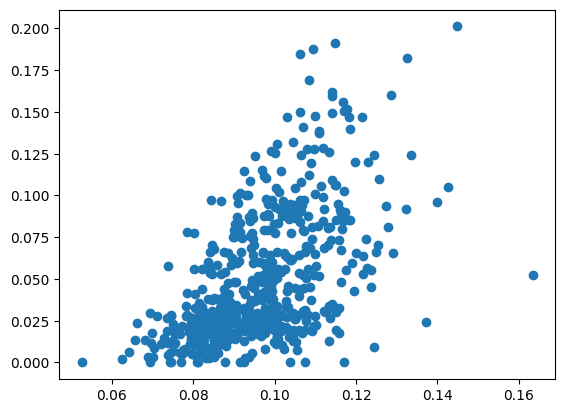

In [24]:
plt.scatter(x='smoothness_mean', y='concave points_mean', data=ds_f)

In [25]:
ds_f.query('`concave points_mean` > 0.200 | smoothness_mean > 0.16') #122 504

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
122,24.250,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.20120,0.2655,0.06877
504,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,0.09502


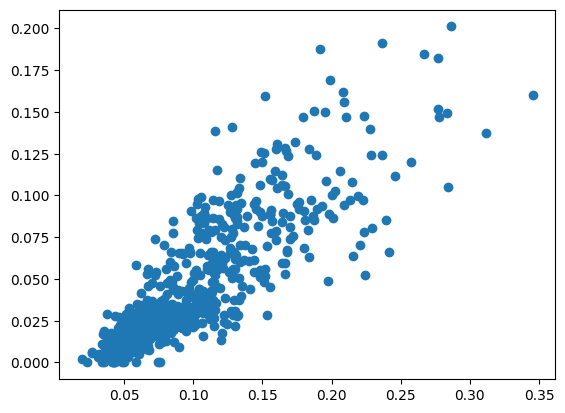

In [26]:
plt.scatter(x='compactness_mean', y='concave points_mean', data=ds_f)

In [27]:
ds_f.query('compactness_mean > 0.32') #78

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
78,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,0.08142


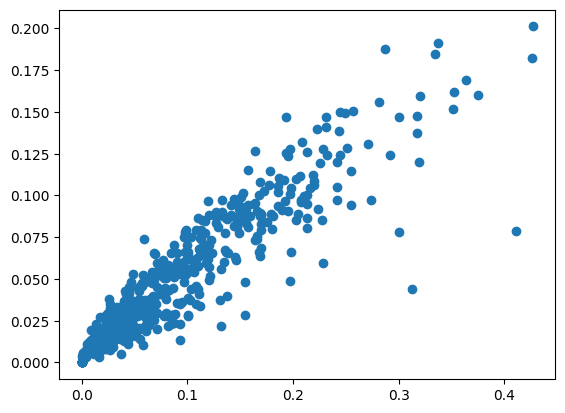

In [28]:
plt.scatter(x='concavity_mean', y='concave points_mean', data=ds_f)

In [29]:
ds_f.query('concavity_mean > 0.4') #108 122 152

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
108,22.270,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,0.2556,0.07039
122,24.250,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.20120,0.2655,0.06877
152,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,0.09296


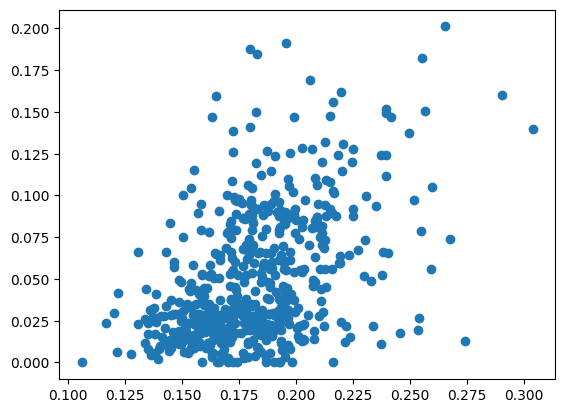

In [30]:
plt.scatter(x='symmetry_mean', y='concave points_mean', data=ds_f)

In [31]:
ds_f.query('symmetry_mean > 0.275') #78 25

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
25,17.14,16.40,116.0,912.7,0.1186,0.2276,0.2229,0.1401,0.3040,0.07413
78,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,0.08142


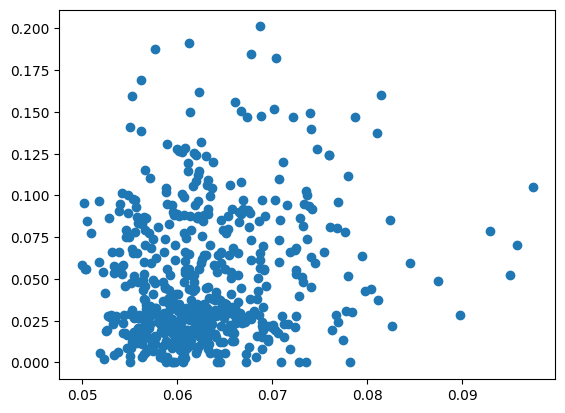

In [32]:
plt.scatter(x='fractal_dimension_mean', y='concave points_mean', data=ds_f)

In [33]:
ds_f.query('fractal_dimension_mean > 0.09') #3 152 504 505

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
3,11.420,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744
152,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,0.09296
504,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,0.2378,0.09502
505,9.676,13.14,64.12,272.5,0.1255,0.2204,0.1188,0.07038,0.2057,0.09575


In [34]:
ds_f = ds_f.drop(index=[461, 352, 212, 180, 122, 82])

In [35]:
ds_f_y = ds_f.copy()
ds_f_y['diagnosis'] = y

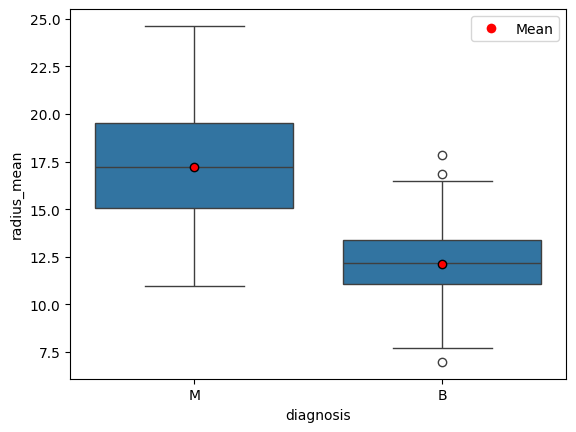

In [36]:
sns.boxplot(data=ds_f_y, x="diagnosis", y="radius_mean", showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})

plt.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Mean')],
           ['Mean'], loc='upper right', frameon=True)

plt.show()

<Axes: >

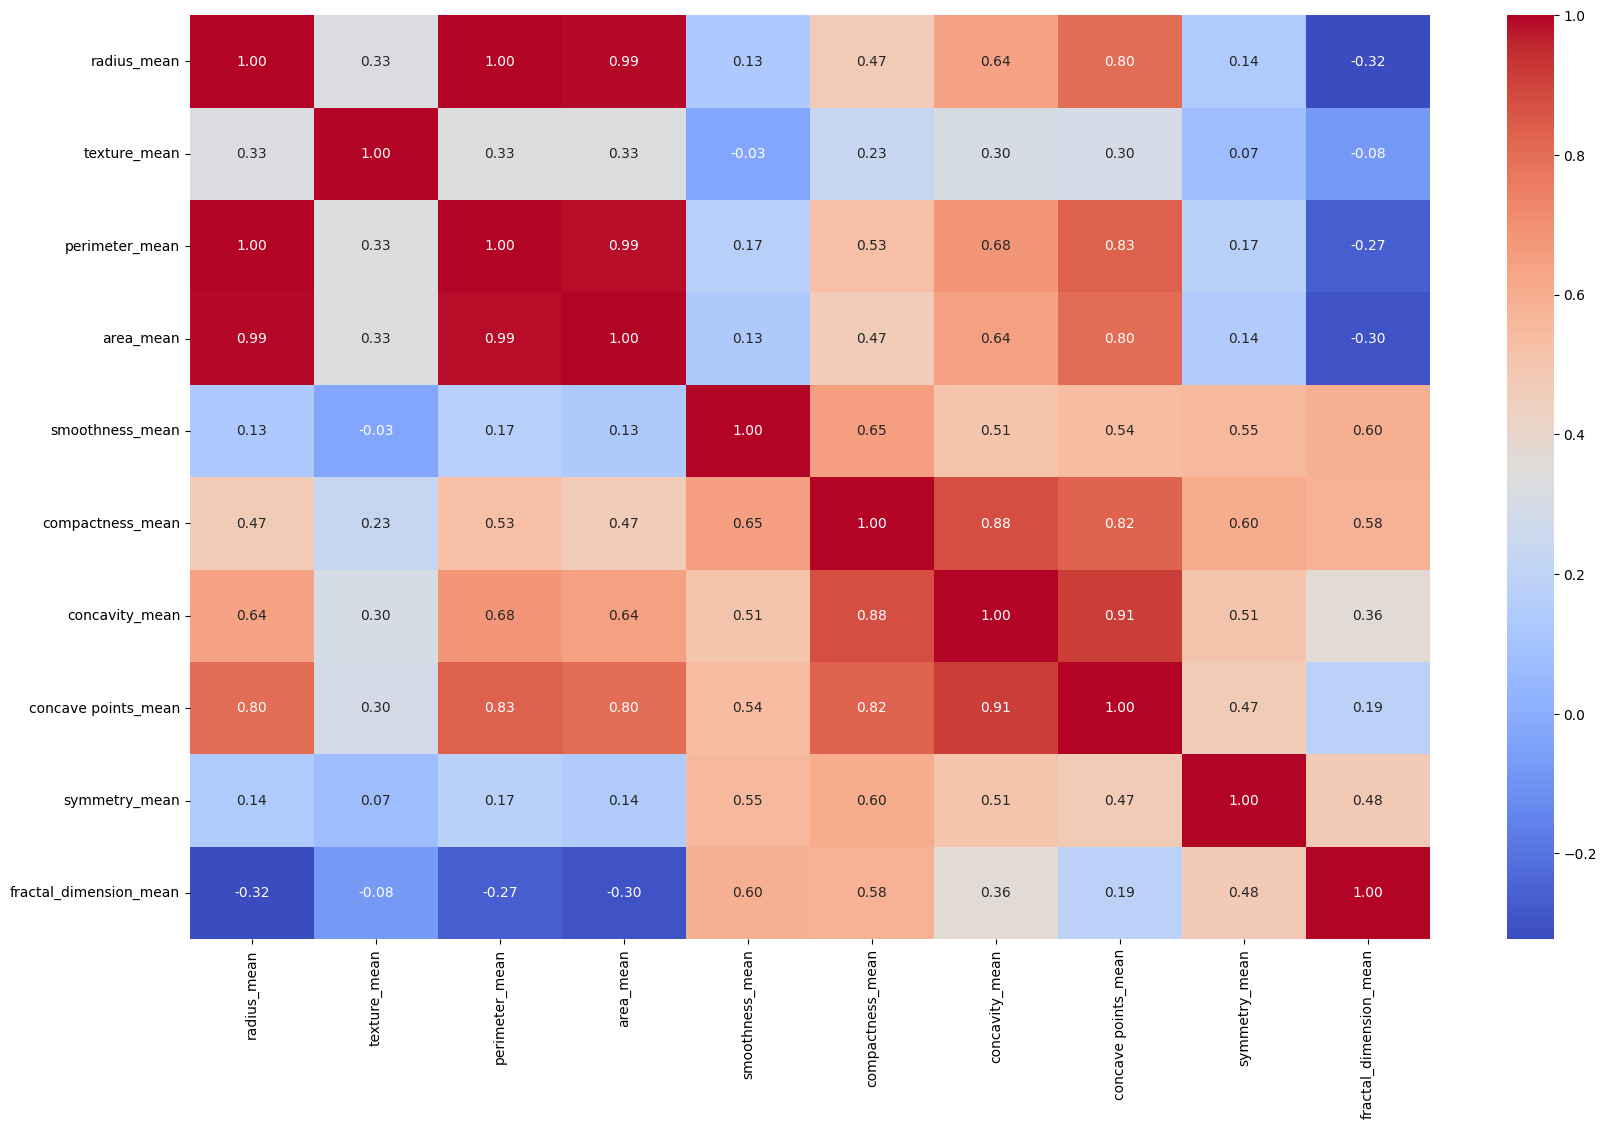

In [37]:
correlation_matrix = ds_f_y.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [38]:
#drop perimeter_mean area_mean concave points_mean

In [39]:
ds_f_y = ds_f_y.drop(columns=['perimeter_mean', 'area_mean', 'concave points_mean', 'concavity_mean'])

<Axes: >

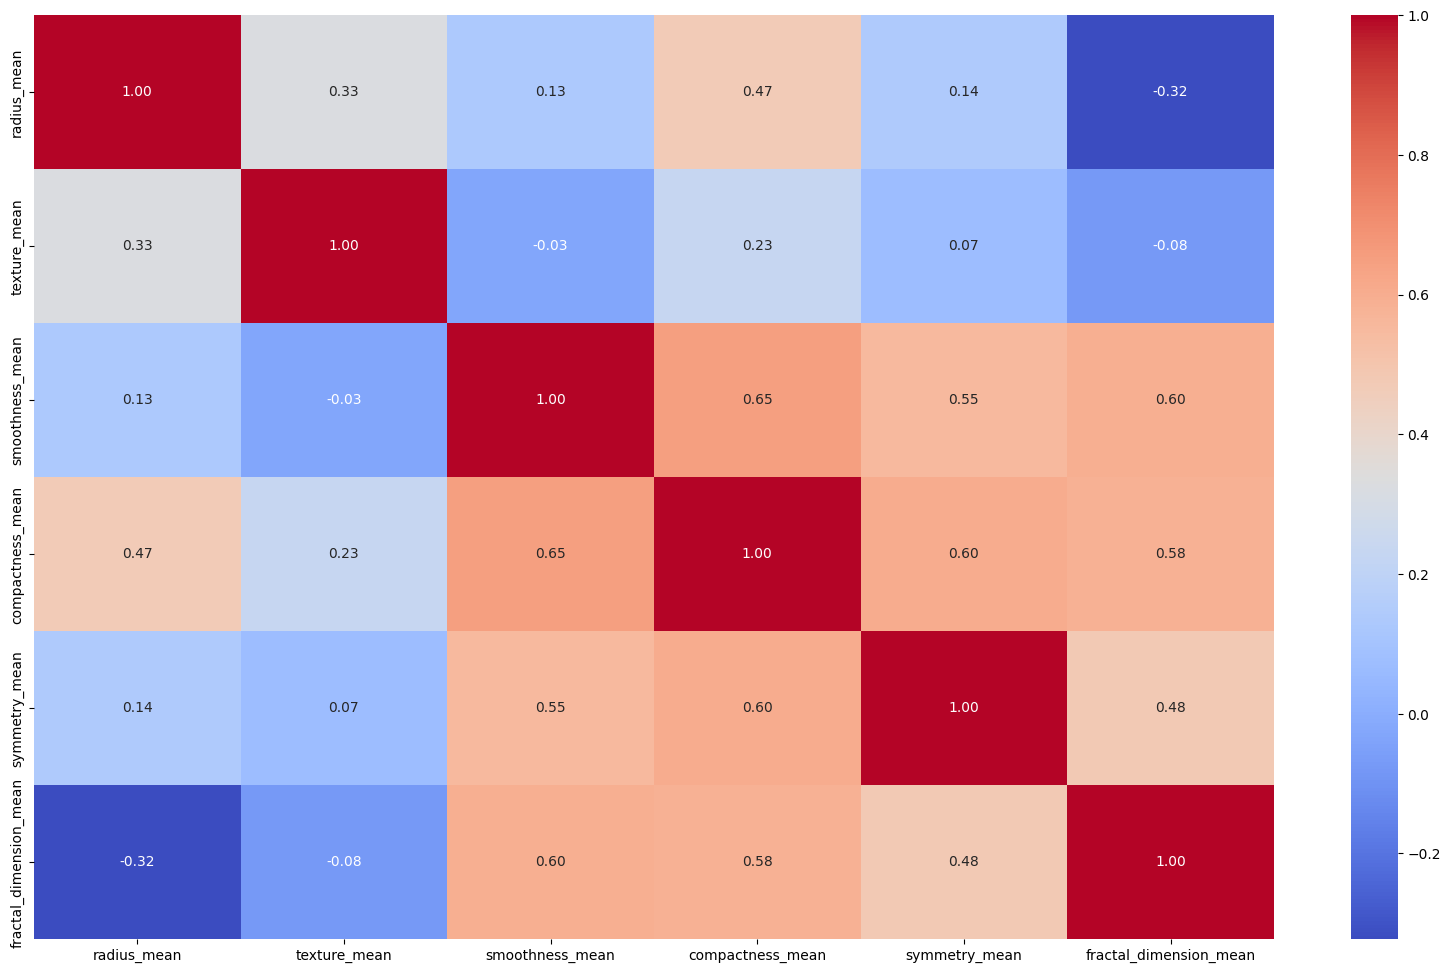

In [40]:
correlation_matrix = ds_f_y.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='diagnosis', ylabel='Count'>

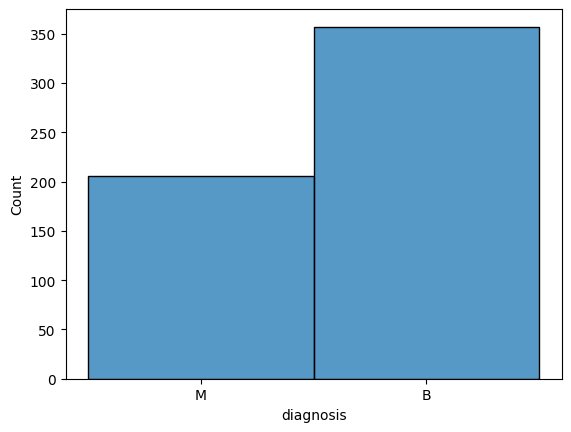

In [41]:
sns.histplot(
    ds_f_y,
    x=ds_f_y['diagnosis']
)

In [42]:
ds_f_y.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,M
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,M
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,M
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,M
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,M


In [43]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding categorical column
encoder = LabelEncoder()
ds_f_y['diagnosis'] = encoder.fit_transform(ds_f_y['diagnosis'])  # Replace 'diagnosis' with the column name

ds_f_y_numeric = ds_f_y.select_dtypes(include=['float', 'int'])

print(ds_f_y.dtypes)

radius_mean               float64
texture_mean              float64
smoothness_mean           float64
compactness_mean          float64
symmetry_mean             float64
fractal_dimension_mean    float64
diagnosis                   int64
dtype: object


In [44]:
y = ds_f_y['diagnosis']
x = ds_f_y.drop('diagnosis', axis=1)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred_LG = model.predict(x_test)

print(classification_report(y_pred_LG, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9577    0.9315    0.9444        73
           1     0.8810    0.9250    0.9024        40

    accuracy                         0.9292       113
   macro avg     0.9193    0.9283    0.9234       113
weighted avg     0.9306    0.9292    0.9296       113



In [47]:
model = LogisticRegression(class_weight='balanced')

model.fit(x_train, y_train)

y_pred_LG_B = model.predict(x_test)

print(classification_report(y_pred_LG_B, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9155    0.9286    0.9220        70
           1     0.8810    0.8605    0.8706        43

    accuracy                         0.9027       113
   macro avg     0.8982    0.8945    0.8963       113
weighted avg     0.9023    0.9027    0.9024       113



In [48]:
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

model.fit(x_train, y_train)

y_pred_LG_E = model.predict(x_test)

print(classification_report(y_pred_LG_E, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.8452    0.9161        84
           1     0.6905    1.0000    0.8169        29

    accuracy                         0.8850       113
   macro avg     0.8452    0.9226    0.8665       113
weighted avg     0.9206    0.8850    0.8907       113



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [49]:
model_L1 = LogisticRegression(penalty='l1', solver='liblinear')
model_L2 = LogisticRegression(penalty='l2', solver='lbfgs')

model_L1.fit(x_train, y_train)
model_L2.fit(x_train, y_train)

y_pred_L1 = model_L1.predict(x_test)
y_pred_L2 = model_L1.predict(x_test)

print(classification_report(y_pred_L1, y_test, labels=None, digits=4))
print(classification_report(y_pred_L2, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9718    0.9324    0.9517        74
           1     0.8810    0.9487    0.9136        39

    accuracy                         0.9381       113
   macro avg     0.9264    0.9406    0.9327       113
weighted avg     0.9405    0.9381    0.9386       113

              precision    recall  f1-score   support

           0     0.9718    0.9324    0.9517        74
           1     0.8810    0.9487    0.9136        39

    accuracy                         0.9381       113
   macro avg     0.9264    0.9406    0.9327       113
weighted avg     0.9405    0.9381    0.9386       113



In [50]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(x_train, y_train)

y_pred_MLG = model.predict(x_test)

print(classification_report(y_pred_MLG, y_test, labels=None, digits=4))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0     0.9718    0.9324    0.9517        74
           1     0.8810    0.9487    0.9136        39

    accuracy                         0.9381       113
   macro avg     0.9264    0.9406    0.9327       113
weighted avg     0.9405    0.9381    0.9386       113



In [51]:
from sklearn.metrics import confusion_matrix

Normalized confusion matrix
[[0.97 0.03]
 [0.12 0.88]]


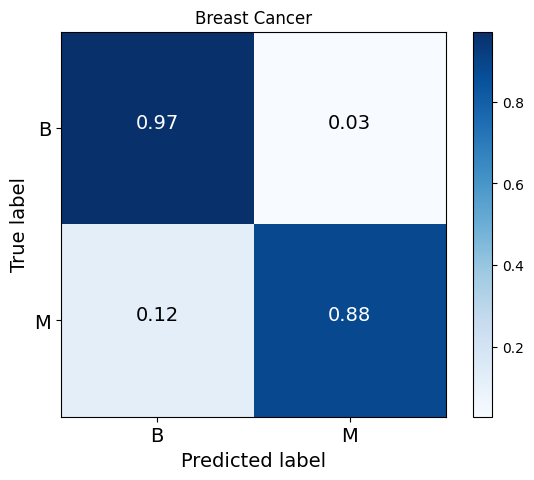

In [52]:
cm = confusion_matrix(y_test, y_pred_MLG)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred_MLG)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)

In [53]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import classification_report

model = RF(n_estimators=30, max_depth=200,random_state=64)

model.fit(x_train, y_train)

pred_RF = model.predict(x_test)

print(classification_report(pred_RF, y_test, labels=None, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9467    0.9726        75
           1     0.9048    1.0000    0.9500        38

    accuracy                         0.9646       113
   macro avg     0.9524    0.9733    0.9613       113
weighted avg     0.9680    0.9646    0.9650       113



Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


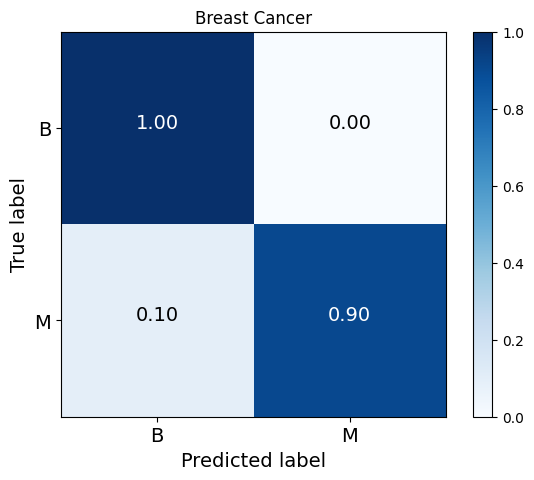

In [54]:
cm = confusion_matrix(y_test, pred_RF)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_RF)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)

In [55]:
!pip install xgboost
from xgboost import XGBClassifier

In [56]:
model=XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,

              colsample_bynode=1, colsample_bytree=1, gamma=0.7,

              learning_rate=0.1, max_delta_step=0, max_depth=200,

              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,

              nthread=None, objective='binary:logistic', random_state=0,

              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,

              silent=None, subsample=1, verbosity=1)

model.fit(x_train, y_train)

pred_X = model.predict(x_test)

print(classification_report(y_test, pred_X))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.90      0.95        42

    accuracy                           0.96       113
   macro avg       0.97      0.95      0.96       113
weighted avg       0.97      0.96      0.96       113



Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


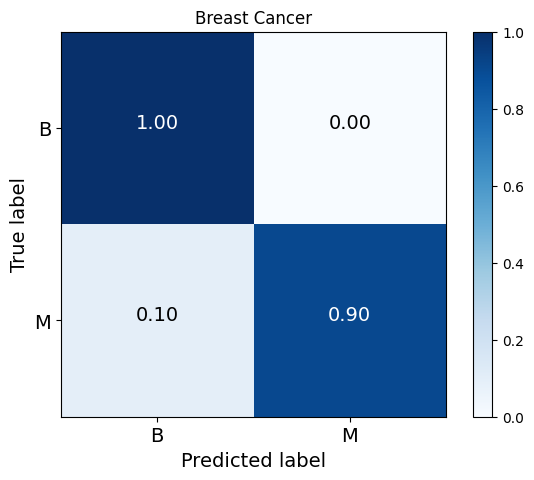

In [57]:
cm = confusion_matrix(y_test, pred_X)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_X)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)

In [58]:
model = RF(criterion = "gini", max_depth = 200, min_samples_split=30, random_state=54)

model.fit(x_train , y_train)

pred_RFG = model.predict(x_test)

print(classification_report(y_test,pred_RFG, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9333    0.9859    0.9589        71
           1     0.9737    0.8810    0.9250        42

    accuracy                         0.9469       113
   macro avg     0.9535    0.9334    0.9420       113
weighted avg     0.9483    0.9469    0.9463       113



Normalized confusion matrix
[[0.99 0.01]
 [0.12 0.88]]


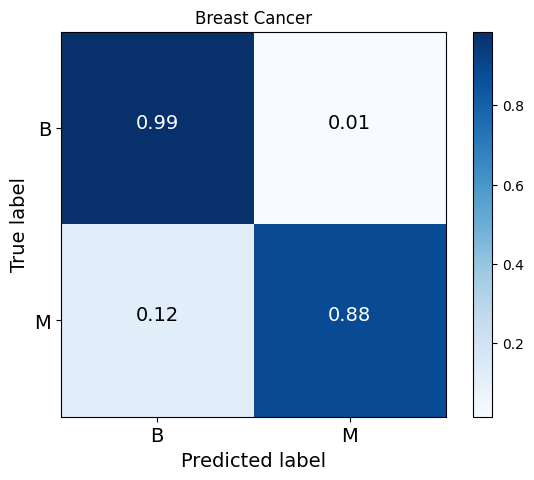

In [59]:
cm = confusion_matrix(y_test, pred_RFG)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_RFG)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

pred_d = model.predict(x_test)

print(classification_report(y_test, pred_d, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9577    0.9577    0.9577        71
           1     0.9286    0.9286    0.9286        42

    accuracy                         0.9469       113
   macro avg     0.9432    0.9432    0.9432       113
weighted avg     0.9469    0.9469    0.9469       113



Normalized confusion matrix
[[0.96 0.04]
 [0.07 0.93]]


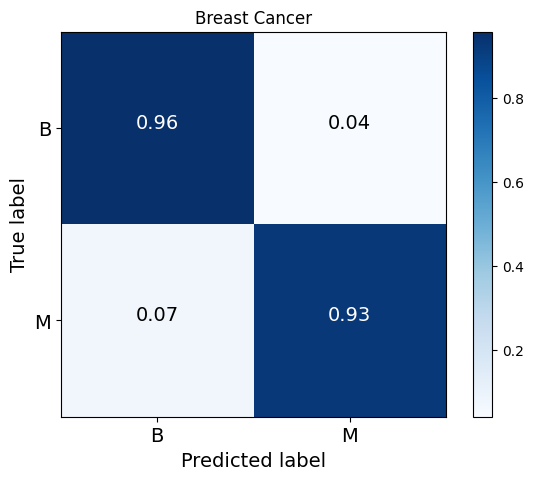

In [61]:
cm = confusion_matrix(y_test, pred_d)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_d)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)

In [62]:
from sklearn.svm import SVC
model = SVC(kernel="rbf")

model.fit(x_train, y_train)

pred_S = model.predict(x_test)

print(classification_report(y_test, pred_S, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9200    0.9718    0.9452        71
           1     0.9474    0.8571    0.9000        42

    accuracy                         0.9292       113
   macro avg     0.9337    0.9145    0.9226       113
weighted avg     0.9302    0.9292    0.9284       113



Normalized confusion matrix
[[0.97 0.03]
 [0.14 0.86]]


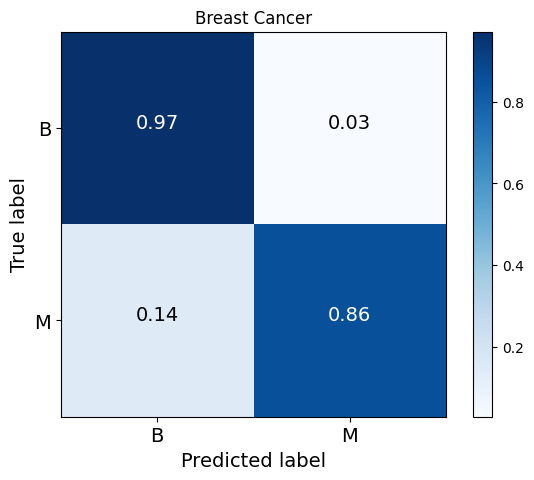

In [63]:
cm = confusion_matrix(y_test, pred_S)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_S)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)

In [64]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)

pred_A = model.predict(x_test)

print(classification_report(y_test, pred_A, labels=None, digits=4))

              precision    recall  f1-score   support

           0     0.9315    0.9577    0.9444        71
           1     0.9250    0.8810    0.9024        42

    accuracy                         0.9292       113
   macro avg     0.9283    0.9193    0.9234       113
weighted avg     0.9291    0.9292    0.9288       113



Normalized confusion matrix
[[0.96 0.04]
 [0.12 0.88]]


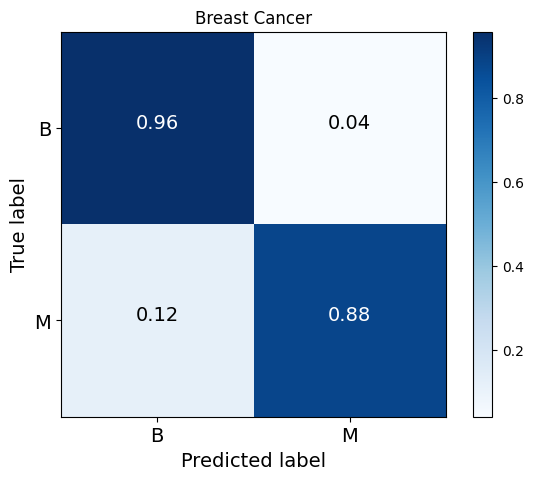

In [65]:
cm = confusion_matrix(y_test, pred_A)

import itertools

def plot_confusion_matrix(cm, classes,

                          normalize=True,

                          title='Breast Cancer',

                          cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')



    print(cm)



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, fontsize=14)

    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, format(cm[i, j], fmt),

                 horizontalalignment="center", fontsize=14,

                 color="white" if cm[i, j] > thresh else "black")



    plt.ylabel('True label', fontsize=14)

    plt.xlabel('Predicted label', fontsize=14)





# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_A)

np.set_printoptions(precision=2)

class_names= ['B', 'M']

#class_names= ['cardboard', 'metal']

# Plot non-normalized confusion matrix

plt.figure(figsize=(7,5))

plot_confusion_matrix(cnf_matrix, classes=class_names)